## Problem - 6

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#### Function to plot CDFs for Normal or Lognormal distributions

In [9]:
def plot_cdf(n_vals, dist_type, mean=0, variance=1):
    plt.figure(figsize=(10, 5))  # Set plot size

    for n in n_vals:
        # Generate samples based on distribution type
        if dist_type == "normal":
            X = np.random.normal(loc=mean, scale=np.sqrt(variance), size=(10000, n))
        elif dist_type == "lognormal":
            sigma = np.sqrt(np.log(variance / mean**2 + 1))
            mu = np.log(mean) - sigma**2 / 2
            X = np.random.lognormal(mean=mu, sigma=sigma, size=(10000, n))

        # Centralize and normalize the sum for CLT approximation
        Z_n = (np.sum(X, axis=1) - n * mean) / (np.sqrt(n) * np.sqrt(variance))

        # Calculate CDF
        sorted_Z_n = np.sort(Z_n)
        cdf_vals = np.arange(1, len(sorted_Z_n) + 1) / len(sorted_Z_n)

        # Plot the CDF
        plt.plot(sorted_Z_n, cdf_vals, label=f'n = {n}')

    plt.title(f'CDFs of Zn for {dist_type.capitalize()} Distribution')
    plt.xlabel('Z_n')
    plt.ylabel('CDF')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

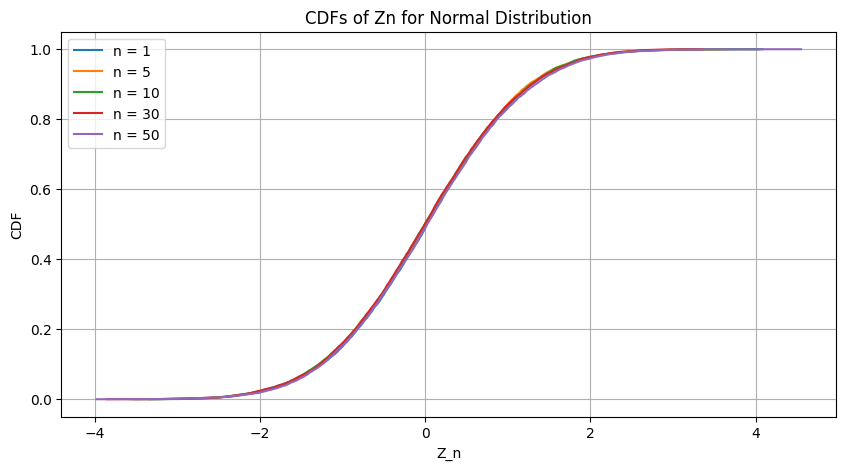

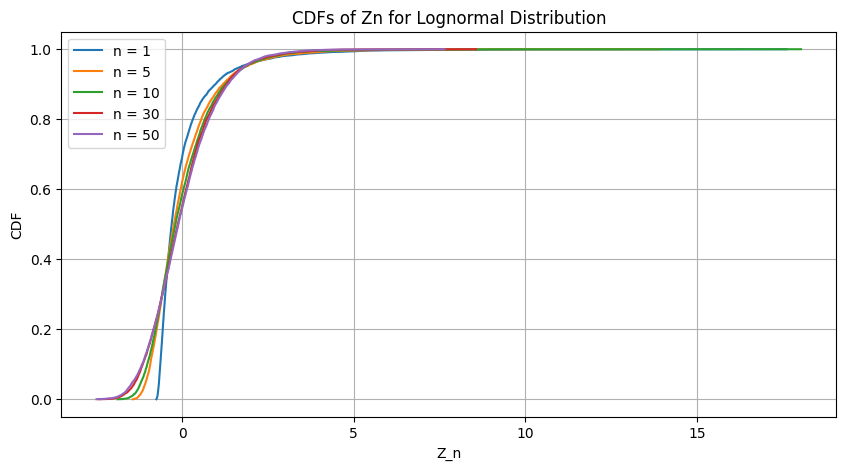

In [10]:
# Test cases
n_vals = [1, 5, 10, 30, 50]
plot_cdf(n_vals, dist_type="normal", mean=0, variance=1)
plot_cdf(n_vals, dist_type="lognormal", mean=1, variance=np.exp(1) - 1)

- For the normal distribution case, the random variables themselves are normally distributed with mean 0 and variance 1.
- As n increases, the sum of the random variables is normalized to form Zn, which follows a normal distribution due to the CLT.

## Problem - 7

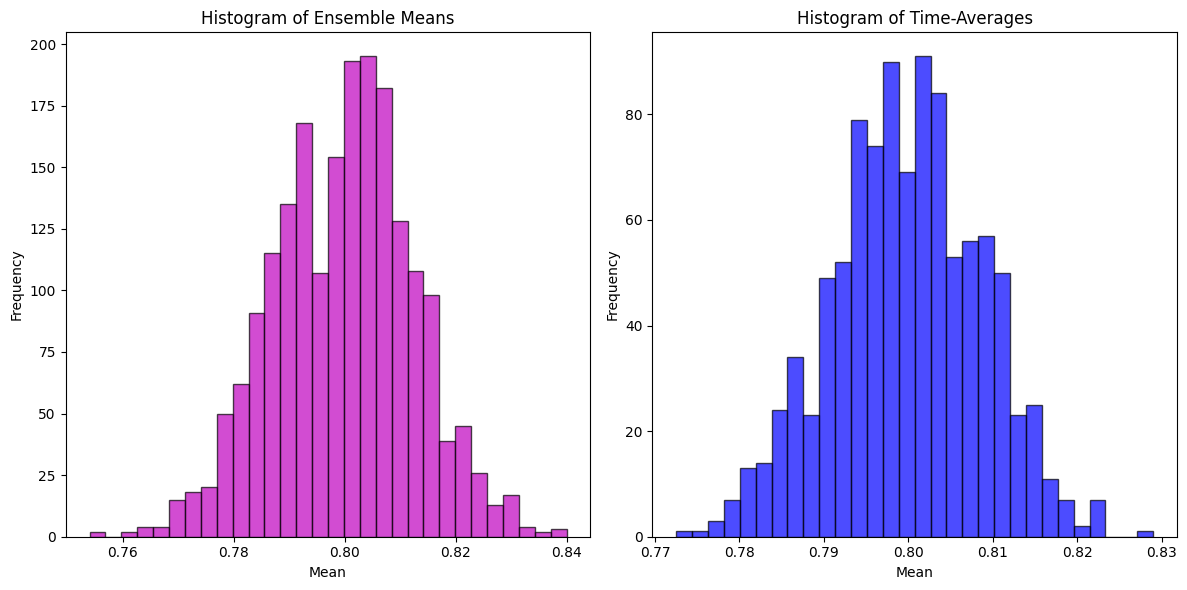

Mean of ensemble means: 0.7998, Std Dev: 0.0127
Mean of time-averages: 0.7998, Std Dev: 0.0089


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# number of sample functions
n_funcs = 1000

# time steps
n_steps = 2000

# Generating Bernoulli samples
samples = np.random.binomial(1, 0.8, (n_funcs, n_steps))

# Calculating ensemble means
ens_means = np.mean(samples, axis=0)

# Calculating time-averages
time_avgs = np.mean(samples, axis=1)

# Plotting histograms for ensemble means and time averages
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(ens_means, bins=30, color='m', alpha=0.7, edgecolor='black')
plt.title('Histogram of Ensemble Means')
plt.xlabel('Mean')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(time_avgs, bins=30, color='b', alpha=0.7, edgecolor='black')
plt.title('Histogram of Time-Averages')
plt.xlabel('Mean')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculating mean and standard deviation for ensemble means and time averages
mean_ens = np.mean(ens_means)
mean_time = np.mean(time_avgs)
std_ens = np.std(ens_means)
std_time = np.std(time_avgs)

# Prints results
print(f"Mean of ensemble means: {mean_ens:.4f}, Std Dev: {std_ens:.4f}")
print(f"Mean of time-averages: {mean_time:.4f}, Std Dev: {std_time:.4f}")


Ensemble Means: The ensemble mean is computed by averaging across the sample functions at each time step. The histogram shows the distribution of these means. The mean of the ensemble means should be close to the probability of success (0.8), as it represents the average behavior of all sample functions over time.

Time Averages: The time average is computed by averaging across time steps for each sample function. The histogram shows the distribution of these averages. The mean of the time averages is expected to be close to 0.8 as well, reflecting the long-term average behavior of individual sample functions.